# HomeWork 6

**DeadLine : 12:00 PM 12 Aban 1399**

**Total points : 125 pts**


Import some prerequisites

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting

In [4]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [5]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.
    
    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    
    Returns:
        (tuple): tuple of two point of line.
    '''
    
    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# PART 4A

**Point : 15 pts**

Here is for your helper functions(optional)

Implement this function to detect and remove circles in the given image.

In [4]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    

    #Writer your code here
    gray = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(3,3),1)
    detected_circles = cv2.HoughCircles(gray,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 100)
    for x, y, r in detected_circles[0]:
        cv2.circle(out_img, (x,y), int(r+3), 0, -1)  #r +/- <4  
    return out_img

Test your implementation (dont change this cell)

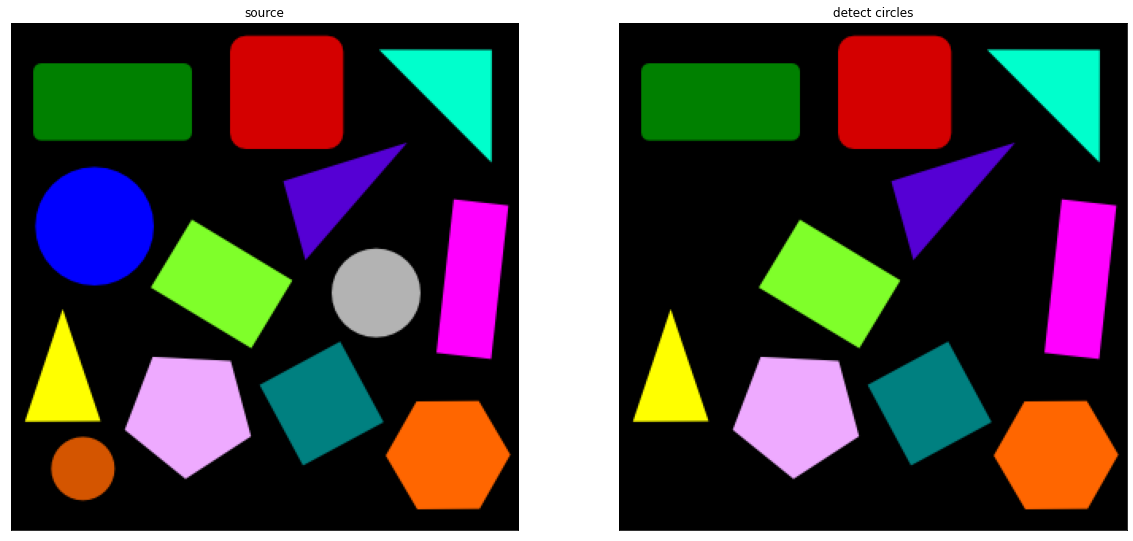

In [5]:
image_list = []

image = cv2.imread(os.path.join('images', '1.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# PART 4B

**Point : 15 pts**

Implement this function to detect lines in the given image with hough algorithm.

In [9]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    
    #Writer your code here
    gray = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(3,3),1)
    edges = cv2.Canny(gray,20,100)
    lines=np.array([])
    
    #The other parameter rho=0.1 defines how fat a row of the accumulator is.
    #Output vector of lines. Each line is represented by a 4 element vector (x1,y1,x2,y2) , where (x1,y1) and (x2,y2) are the
    #Angle resolution of the accumulator in radians
    lines = cv2.HoughLinesP(edges, 0.1, np.pi / 180, 1, lines)
    
    white=(255,255,255)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(out_img,(x1,y1),(x2,y2),white,2) #draw white lines


    return out_img

Test your implementation (dont change this cell)

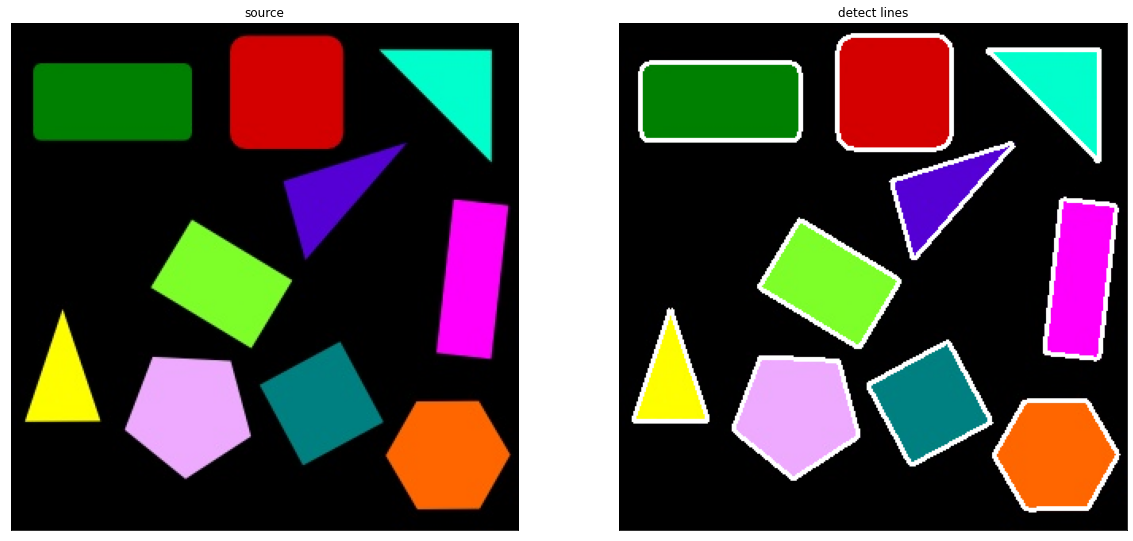

In [13]:
image_list = []

image = cv2.imread(os.path.join('images', '1b.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# PART 5

**Point : 25 pts**

Here is for your helper functions(optional)

In [13]:
import random
def non_zero_pixels(img):
    white_pixels=[]
    m,n=img.shape
    for i in range(m):
        for j in range(m):
            if img[i,j] != 0:
                white_pixels.append((np.float32(i),np.float32(j)))
    return white_pixels

def random_points(white_pixels):
    p1=0
    p2=0
    p1,p2 = random.sample(range(len(white_pixels)),2)
    point1, point2 = white_pixels[p1], white_pixels[p2]
    return point1, point2

def line_from_points(point1,point2):
    x1,y1=point1
    x2,y2=point2
    m = (y2 - y1) / (x2 - x1)
    c = y1 - m * x1
    return m,c

def distance(dots,m,c):
    threshold=1
    inlinear_points = []
    for d in dots:
        temp_x,temp_y=d
        distance = np.abs((m*temp_x+c)-temp_y)
        if distance < threshold:
            inlinear_points.append(d)        
    return len(inlinear_points), np.array(inlinear_points)
    

def car_to_pal(inlinear_points):
    x_bar=0
    y_bar=0
    xy_bar=0
    x2_bar=0
    y2_bar=0
    x_bar2=0
    y_bar2=0
    temp_x=0
    temp_y=0
    temp_xy=0
    count=len(inlinear_points)
    
    for i in range(count):
        x,y=inlinear_points[i]
        temp_x+=x
        temp_y+=y
        temp_xy+=x*y
    x_bar=temp_x/count
    y_bar=temp_y/count
    xy_bar=temp_xy/count
    
    square_inliers=np.square(inlinear_points)
    temp_x=0
    temp_y=0
    temp_xy=0
    for i in range(count):
        x,y=square_inliers[i]
        temp_x+=x
        temp_y+=y
    x2_bar=temp_x/count
    y2_bar=temp_x/count
    
    x_bar2, y_bar2 = np.square(x_bar), np.square(y_bar)
    
    theta = 0.5 * np.arctan((2*(xy_bar - x_bar*y_bar))/(x2_bar - y2_bar - x_bar2 + y_bar2))
    rho = x_bar * np.cos(theta) + y_bar*np.sin(theta)
    
    return rho, theta

Implement RANSAC function here.

In [14]:
def ransac(image):
    '''
    Gets input image and return rho and theta of line detected. 
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    '''

    img = image.copy()
    rho, theta = 0, 0

    #Write your code here
    white_pixels=non_zero_pixels(img)
    max_inlier_points=-999999
    for i in range(20):
        point1,point2=random_points(white_pixels)
        m,c=line_from_points(point1,point2)
        count,inlinear_points=distance(white_pixels,m,c)
        if count>max_inlier_points:
            max_inlier_points=count
            max_inliers=inlinear_points
    

    rho,theta=car_to_pal(max_inliers)

    return rho, theta

Test your implementation (dont change this cell)

24.27165019542252 -0.040514634197906504
64 998 -16 -1000


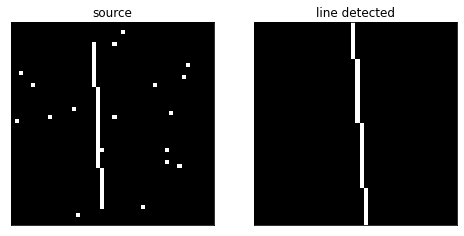

In [15]:
image_list = []
image = cv2.imread(os.path.join('images', '2.bmp'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
rho, theta = ransac(image)
print(rho, theta)
x1, y1, x2, y2 = pol_to_car(rho, theta)
print(x1, y1, x2, y2)
image_res = np.zeros_like(image)
cv2.line(image_res, (x1, y1), (x2, y2), (255), 1)
image_list.append([image_res, 'line detected', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'q5')

# PART 6

**Point : 25pts**

Here is for your helper functions(optional)

Implement this function for return rho and theat of line detected and hough transform image.

In [6]:
def hough_transform_line(image):
    '''
    Returns rho and theat of line detected and hough transform image.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        rho (float): Angle from origin to the line.
        theta (float): The distance from the origin to the line.
        hough_transform (numpy.ndarray): Hough transform image.
    '''

    img = image.copy()
    hough_transform = np.zeros_like(img)
    rho, theta = 0, 0

    #Write your code here
   
    # Rho and Theta ranges
    dtheta = 1
    drho = 1
    width, height = img.shape
    
    thetas =np.deg2rad(np.arange(-90,90,step=1))
    distance=int(np.sqrt(np.square(height) + np.square(width)))  
    rhos = np.arange(-distance, distance, step=drho)

    cos_thetas = np.cos(thetas)
    sin_thetas = np.sin(thetas)
    
    hough_transform = np.zeros((2*distance, len(thetas)))
    
    #edge detection
    edges = cv2.Canny(img, 20, 120)
    value_threshold =0
    are_edges = np.where(edges > value_threshold)
    y_idxs, x_idxs =are_edges
    
    #voting
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        for t_idx in range(len(thetas)):
            rho = int(round(x * cos_thetas[t_idx] + y * sin_thetas[t_idx])+int(distance))
            hough_transform[rho][t_idx] += 1
            
    #Find the value(s) of rho,theta where hough_transform(rho,theta) is a large local maximum  
    print(hough_transform.shape)
    max_value=np.argmax(hough_transform)
    print(max_value)
    x_max,y_max=np.unravel_index(max_value,hough_transform.shape)
    rho = x_max-distance
    theta = thetas[y_max]

    return rho, theta, hough_transform

Test your implementation (dont change this cell)

(140, 180)
9558


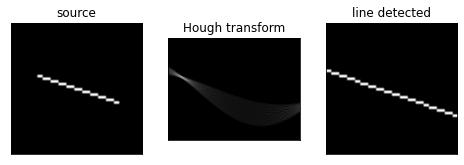

In [7]:
image_list = []
image = cv2.imread(os.path.join('images', '3.bmp'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
rho, theta, hough_transform = hough_transform_line(image)
x1, y1, x2, y2 = pol_to_car(rho, theta)
image_list.append([hough_transform, 'Hough transform', 'img'])
image_res = np.zeros_like(image)
cv2.line(image_res, (x1, y1), (x2, y2), (255), 1)
image_list.append([image_res, 'line detected', 'img'])
plotter(image_list, 1, 3, True, 8, 6, 'q6')

for create proper files for sending in quera run this cell.

In [24]:
!python notebook_converter.py

End!!!